In [1]:
from net2brain.utils.download_datasets import DatasetNSD_872
from utils.feature_extraction import FeatureExtractor as FeatureExtractor_1

from utils.ridge_regression import Ridge_Encoding, RidgeCV_Encoding
from net2brain.evaluations.plotting import Plotting
import os
import numpy as np
import torch
import torch.nn as nn
import copy
import random
from tqdm import tqdm
from evolution.architecture import Architecture

from net2brain.rdm_creation import RDMCreator
from net2brain.feature_extraction import FeatureExtractor

/Users/lukaskuhn/Documents/Code/BrainEvo/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
paths_NSD_872 = DatasetNSD_872().load_dataset()

In [3]:
stimuli_path = paths_NSD_872["NSD_872_images"]
roi_path = paths_NSD_872["NSD_872_fmri"] 

In [4]:
# Create list of layer dictionaries
# Create list of layer dictionaries
layers = [
    # Layer 1: First conv layer
    {
        'type': 'conv',
        'out_channels': 384,
        'kernel_size': 7,
        'stride': 4,
        'padding': 0,
    },
    # Layer 2: First pool layer
    {
        'type': 'pool',
        'kernel_size': 3,
        'stride': 2,
    },
    # Layer 3: Second conv layer
    {
        'type': 'conv',
        'out_channels': 512,
        'kernel_size': 11,
        'stride': 1,
        'padding': 5,
    },
    # Layer 4: Second pool layer
    {
        'type': 'pool',
        'kernel_size': 3,
        'stride': 2,
    },
    # Layer 5: Third conv layer
    {
        'type': 'conv',
        'out_channels': 512,
        'kernel_size': 3,
        'stride': 1,
        'padding': 1,
    },
    # Layer 6: Third pool layer
    {
        'type': 'pool',
        'kernel_size': 3,
        'stride': 2,
    },
    # Layer 7: Fourth conv layer
    {
        'type': 'conv',
        'out_channels': 512,
        'kernel_size': 9,
        'stride': 1,
        'padding': 4,
    },
    # Layer 8: Fifth conv layer
    {
        'type': 'conv',
        'out_channels': 512,
        'kernel_size': 5,
        'stride': 1,
        'padding': 2,
    },
    # Layer 9: Sixth conv layer
    {
        'type': 'conv',
        'out_channels': 512,
        'kernel_size': 5,
        'stride': 1,
        'padding': 2,
    }
]


layers_v4 = [
    # Layer 1: First conv layer
    {
        'type': 'conv',
        'out_channels': 384,
        'kernel_size': 11,
        'stride': 3,
        'padding': 0,
    },
    # Layer 2: First pool layer
    {
        'type': 'pool',
        'kernel_size': 2,
        'stride': 2,
    },
    # Layer 3: Second conv layer
    {
        'type': 'conv',
        'out_channels': 512,
        'kernel_size': 9,
        'stride': 1,
        'padding': 4,
    },
    # Layer 4: Second pool layer
    {
        'type': 'pool',
        'kernel_size': 3,
        'stride': 2,
    },
    # Layer 5: Third conv layer
    {
        'type': 'conv',
        'out_channels': 512,
        'kernel_size': 5,
        'stride': 1,
        'padding': 2,
    },
    # Layer 6: Third pool layer
    {
        'type': 'pool',
        'kernel_size': 3,
        'stride': 2,
    }
]

layers_v2 = [
    # Layer 1: First conv layer
    {
        'type': 'conv',
        'out_channels': 256,
        'kernel_size': 11,
        'stride': 3,
        'padding': 0,
    },
    # Layer 2: First pool layer
    {
        'type': 'pool',
        'kernel_size': 3,
        'stride': 2,
    },
    # Layer 3: Second conv layer
    {
        'type': 'conv',
        'out_channels': 256,
        'kernel_size': 3,
        'stride': 1,
        'padding': 1,
    },
    # Layer 4: Second pool layer
    {
        'type': 'pool',
        'kernel_size': 3,
        'stride': 2,
    },
    # Layer 5: Third conv layer
    {
        'type': 'conv',
        'out_channels': 384,
        'kernel_size': 5,
        'stride': 1,
        'padding': 2,
    },
    # Layer 6: Third pool layer
    {
        'type': 'pool',
        'kernel_size': 3,
        'stride': 2,
    }
]

layers_V1 = [
    # Layer 1: First conv layer
    {
        'type': 'conv',
        'out_channels': 512,
        'kernel_size': 9,
        'stride': 2,
        'padding': 0,
    },
    # Layer 2: First pool layer
    {
        'type': 'pool',
        'kernel_size': 3,
        'stride': 2,
    },
    # Layer 3: Second conv layer
    {
        'type': 'conv',
        'out_channels': 512,
        'kernel_size': 5,
        'stride': 1,
        'padding': 2,
    },
    # Layer 4: Second pool layer
    {
        'type': 'pool',
        'kernel_size': 2,
        'stride': 2,
    },
    # Layer 5: Third conv layer
    {
        'type': 'conv',
        'out_channels': 512,
        'kernel_size': 9,
        'stride': 1,
        'padding': 4,
    },
    # Layer 6: Third pool layer
    {
        'type': 'pool',
        'kernel_size': 3,
        'stride': 2,
    }
]


# Create the architecture
architecture = Architecture(layers=layers)

# Build the model (assuming you have a device defined)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = architecture.build_model(device)
print(model)

total_params = sum(p.numel() for p in model.parameters())
print(total_params)

#model.load_state_dict(torch.load("model_checkpoint_IT.pth")["model_state_dict"], strict=False)

Sequential(
  (0): Conv2d(3, 384, kernel_size=(7, 7), stride=(4, 4))
  (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(384, 512, kernel_size=(11, 11), stride=(1, 1), padding=(5, 5))
  (5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(512, 512, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): ReLU()
  (15): Conv2d(512, 512, kernel_size=(5, 5), 

In [5]:
model.apply(architecture.init_weights)

Sequential(
  (0): Conv2d(3, 384, kernel_size=(7, 7), stride=(4, 4))
  (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(384, 512, kernel_size=(11, 11), stride=(1, 1), padding=(5, 5))
  (5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(512, 512, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): ReLU()
  (15): Conv2d(512, 512, kernel_size=(5, 5), 

In [10]:
from collections import OrderedDict
from torch import nn
import math

class Flatten(nn.Module):

    """
    Helper module for flattening input tensor to 1-D for the use in Linear modules
    """

    def forward(self, x):
        return x.view(x.size(0), -1)


class Identity(nn.Module):

    """
    Helper module that stores th"e current tensor. Useful for accessing by name
    """

    def forward(self, x):
        return x

class CORblock_S(nn.Module):

    scale = 4  # scale of the bottleneck convolution channels

    def __init__(self, in_channels, out_channels, times=1):
        super().__init__()

        self.times = times

        self.conv_input = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.skip = nn.Conv2d(out_channels, out_channels,
                              kernel_size=1, stride=2, bias=False)
        self.norm_skip = nn.BatchNorm2d(out_channels)

        self.conv1 = nn.Conv2d(out_channels, out_channels * self.scale,
                               kernel_size=1, bias=False)
        self.nonlin1 = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(out_channels * self.scale, out_channels * self.scale,
                               kernel_size=3, stride=2, padding=1, bias=False)
        self.nonlin2 = nn.ReLU(inplace=True)

        self.conv3 = nn.Conv2d(out_channels * self.scale, out_channels,
                               kernel_size=1, bias=False)
        self.nonlin3 = nn.ReLU(inplace=True)

        self.output = Identity()  # for an easy access to this block's output

        # need BatchNorm for each time step for training to work well
        for t in range(self.times):
            setattr(self, f'norm1_{t}', nn.BatchNorm2d(out_channels * self.scale))
            setattr(self, f'norm2_{t}', nn.BatchNorm2d(out_channels * self.scale))
            setattr(self, f'norm3_{t}', nn.BatchNorm2d(out_channels))

    def forward(self, inp):
        x = self.conv_input(inp)

        for t in range(self.times):
            if t == 0:
                skip = self.norm_skip(self.skip(x))
                self.conv2.stride = (2, 2)
            else:
                skip = x
                self.conv2.stride = (1, 1)

            x = self.conv1(x)
            x = getattr(self, f'norm1_{t}')(x)
            x = self.nonlin1(x)

            x = self.conv2(x)
            x = getattr(self, f'norm2_{t}')(x)
            x = self.nonlin2(x)

            x = self.conv3(x)
            x = getattr(self, f'norm3_{t}')(x)

            x += skip
            x = self.nonlin3(x)
            output = self.output(x)

        return output


def CORnet_S():
    model = nn.Sequential(OrderedDict([
        ('V1', nn.Sequential(OrderedDict([ 
            ('conv1', nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
                            bias=False)),
            ('norm1', nn.BatchNorm2d(64)),
            ('nonlin1', nn.ReLU(inplace=True)),
            ('pool', nn.MaxPool2d(kernel_size=3, stride=2, padding=1)),
            ('conv2', nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1,
                            bias=False)),
            ('norm2', nn.BatchNorm2d(64)),
            ('nonlin2', nn.ReLU(inplace=True)),
            ('output', Identity())
        ]))),
        ('V2', CORblock_S(64, 128, times=2)),
        ('V4', CORblock_S(128, 256, times=4)),
        ('IT', CORblock_S(256, 512, times=2)),
        ('decoder', nn.Sequential(OrderedDict([
            ('avgpool', nn.AdaptiveAvgPool2d(1)),
            ('flatten', Flatten()),
            ('linear', nn.Linear(512, 10)),
            ('output', Identity())
        ])))
    ]))

    # weight initialization
    for m in model.modules():
        if isinstance(m, nn.Conv2d):
            n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
            m.weight.data.normal_(0, math.sqrt(2. / n))
        # nn.Linear is missing here because I originally forgot 
        # to add it during the training of this network
        elif isinstance(m, nn.BatchNorm2d):
            m.weight.data.fill_(1)
            m.bias.data.zero_()

    return model

model = CORnet_S()
model.to(device)
#model.load_state_dict(torch.load("model_checkpoint.pth")["model_state_dict"], strict=False)

total_params = sum(p.numel() for p in model.parameters())
total_params

52908746

In [8]:
from torchvision.models import alexnet, vgg16

def init_weights(m):
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.kaiming_normal_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

model = alexnet(weights=None, num_classes=10) #vgg16(weights=None, num_classes=10)
model.apply(init_weights)

#model.load_state_dict(torch.load("model_checkpoint_vgg16.pth")["model_state_dict"], strict=False)

total_params = sum(p.numel() for p in model.parameters())
total_params

57044810

In [ ]:
# join roi path with the prf-visualrois folder
roi_path = "./ITcombined_old"

In [12]:
model

Sequential(
  (0): Conv2d(3, 384, kernel_size=(7, 7), stride=(4, 4))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(384, 512, kernel_size=(11, 11), stride=(1, 1), padding=(5, 5))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(512, 512, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (10): ReLU()
  (11): Conv2d(512, 512, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (12): ReLU()
  (13): Conv2d(512, 512, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (14): ReLU()
)

In [63]:
layer_names = [
    f"features.{name}" for name, layer in model.features.named_children()
    if not isinstance(layer, nn.ReLU)
]

layer_names

['features.0',
 'features.2',
 'features.4',
 'features.5',
 'features.7',
 'features.9',
 'features.10',
 'features.12',
 'features.14',
 'features.16',
 'features.17',
 'features.19',
 'features.21',
 'features.23',
 'features.24',
 'features.26',
 'features.28',
 'features.30']

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

layerrs = []

#torch.manual_seed(np.random.randint(0, 1000000))
for _ in tqdm(range(20)):
    model = alexnet(num_classes=1000) #vgg16(num_classes=1000).to(device)#architecture.build_model(device)
    #model.apply(architecture.init_weights)
    #model.load_state_dict(torch.load("best_acc1_AlexNet.pth"), strict=False)

    fx = FeatureExtractor_1(model=model, device='cuda', pretrained=True)
    features_1 = fx.extract(data_path=stimuli_path, save_path=f'V4_{np.random.randint(0, 1000000)}', layers_to_extract=layer_names)

    results_dataframe_cv = RidgeCV_Encoding(
        features=features_1,
        roi_path=roi_path,
        model_name="a",
        n_folds=3,
        trn_tst_split=0.8,
        n_components=100,       
        batch_size=512,
        return_correlations=False,
        save_path="results",
        alpha=1.0
    )

    layerrs.append(results_dataframe_cv[['Layer', 'R']])

100%|██████████| 20/20 [1:10:44<00:00, 212.21s/it]


In [65]:
meaned_layerrs = [layerrs[i].groupby('Layer').agg(['mean', 'std']).to_numpy() for i in range(len(layerrs))]

with open("final_results/vgg16_V2.npy", 'wb') as f:
  np.save(f, np.array(meaned_layerrs))

In [69]:

model = alexnet()
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
from architectures import get_model_by_archname
from collections import OrderedDict


model, init_weights = get_model_by_archname("V4")
checkpoint = torch.load("best_acc1_V4.pth")
new_state_dict = OrderedDict()
for k, v in checkpoint.items():
    # Remap keys like '0.0.weight' -> '0.weight'
    new_k = k[2:]
    new_state_dict[new_k] = v

model.load_state_dict(new_state_dict, strict=False)

_IncompatibleKeys(missing_keys=[], unexpected_keys=['1.weight', '1.bias', '4.weight', '4.bias'])

In [9]:
models = ["V2", "V4", "IT", "AlexNet", "CorNetS", "VGG16"]
rois = ["V2combined"]


values_train = []
values_untrained = []

for roi in rois:
    roi_values_train = []
    roi_values_untrained = []

    for model in models:
        """
        print(f"Untrained Model: {model}, ROI: {roi}")
        meaned_layerrs = np.load(f"fin_results/{model}_{roi}.npy")
        meaned_layerrs_mean = np.array(meaned_layerrs).mean(axis=0)
        meaned_layerrs_std = np.array(meaned_layerrs).std(axis=0)
        # best value from meaned_layerrs_mean
        # if the model is V2, V4, or IT, then the best value is the last layer

        best_value = np.max(meaned_layerrs_mean)
        # get layer name of best value
        best_layer = np.where(meaned_layerrs_mean == best_value)[0][0]
        print(f"Best Layer: {best_layer}, Best Value: {best_value}")
        roi_values_untrained.append(best_value)
        """
        meaned_layerrs = np.load(f"fin_results/{model}_trained_{roi}.npy")
        meaned_layerrs_mean = np.array(meaned_layerrs).mean(axis=0)
        meaned_layerrs_std = np.array(meaned_layerrs).std(axis=0)
        # best value from meaned_layerrs_mean
        best_value = np.max(meaned_layerrs_mean)
        # get layer name of best value
        best_layer = np.where(meaned_layerrs_mean == best_value)[0][0]
        print(f"Best Layer: {best_layer}, Best Value: {best_value}")
        roi_values_train.append(best_value)
        

    values_untrained.append(roi_values_untrained)
    values_train.append(roi_values_train)

Best Layer: 8, Best Value: 0.30942678451538086
Best Layer: 8, Best Value: 0.20737260580062866
Best Layer: 13, Best Value: 0.20758798718452454
Best Layer: 1, Best Value: 0.18740801513195038
Best Layer: 0, Best Value: 0.09672053158283234
Best Layer: 3, Best Value: 0.3045899271965027


/var/folders/w9/1m59s4f12dg6tdsy7pdm7ngw0000gn/T/ipykernel_14558/4235496227.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


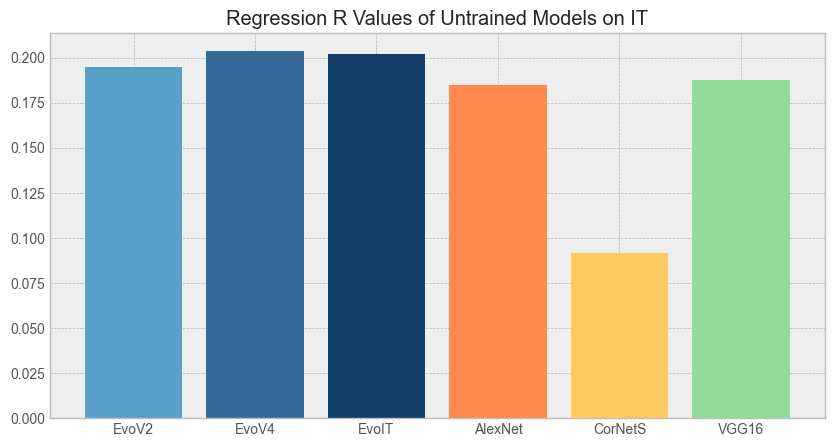

In [72]:
import matplotlib.pyplot as plt
model_names = ["EvoV2", "EvoV4", "EvoIT", "AlexNet", "CorNetS", "VGG16"]

colors = ["#58A0C8", "#34699A", "#113F67", "#FF894F", "#FFCB61", "#93DA97"]

roi = "IT"

plt.style.use('bmh')
plt.figure(figsize=(10, 5))
plt.title(f"Regression R Values of Untrained Models on {roi}")
# each bar should have its own color
for i, model in enumerate(model_names):
    plt.bar(model, values_untrained[2][i], color=colors[i])
plt.legend()
plt.savefig(f"untrained_on_{roi}.png", dpi=300, bbox_inches='tight')
plt.show()

In [25]:
models = ["V2", "V4", "IT", "AlexNet", "CorNetS", "VGG16"]
rois = ["(2) V2_both_fmri", "(4) V4_both_fmri" ,"(0) IT_both_fmri"]


values_train = []
values_untrained = []

for roi in rois:
    roi_values_train = []
    roi_values_untrained = []

    for model in models:
        print(f"Untrained Model: {model}, ROI: {roi}")
        mean_df = pd.read_csv(f"fin_results/{model}_RSA.csv")
        # Filter for the current ROI
        mean_df_roi = mean_df[mean_df['ROI'] == roi]
        # Get best R2 value from mean_df_roi
        best_R2 = mean_df_roi['%R2'].max()
        # Get layer name of best R2 value
        best_layer = mean_df_roi[mean_df_roi['%R2'] == best_R2]['Layer'].values[0]
        print(f"Best R2 value: {best_R2}, Layer: {best_layer}")
        roi_values_untrained.append(best_R2)
        
        print(f"Trained Model: {model}, ROI: {roi}")
        mean_df_trained = pd.read_csv(f"fin_results/{model}_trained_RSA.csv")
        mean_df_trained_roi = mean_df_trained[mean_df_trained['ROI'] == roi]
        best_R2_trained = mean_df_trained_roi['%R2'].max()
        best_layer_trained = mean_df_trained_roi[mean_df_trained_roi['%R2'] == best_R2_trained]['Layer'].values[0]
        print(f"Best R2 value (trained): {best_R2_trained}, Layer: {best_layer_trained}")
        roi_values_train.append(best_R2_trained)
        


    values_untrained.append(roi_values_untrained)
    values_train.append(roi_values_train)

Untrained Model: V2, ROI: (2) V2_both_fmri
Best R2 value: 6.214404352706249, Layer: (5) RDM_8.npz
Trained Model: V2, ROI: (2) V2_both_fmri
Best R2 value (trained): 18.82186500218123, Layer: (8) RDM_8.npz
Untrained Model: V4, ROI: (2) V2_both_fmri
Best R2 value: 4.659754891823117, Layer: (5) RDM_8.npz
Trained Model: V4, ROI: (2) V2_both_fmri
Best R2 value (trained): 19.26641558284481, Layer: (5) RDM_5.npz
Untrained Model: IT, ROI: (2) V2_both_fmri
Best R2 value: 3.8234028446997064, Layer: (5) RDM_8.npz
Trained Model: IT, ROI: (2) V2_both_fmri
Best R2 value (trained): 24.459444577731503, Layer: (8) RDM_8.npz
Untrained Model: AlexNet, ROI: (2) V2_both_fmri
Best R2 value: 5.170363659638953, Layer: (2) RDM_features_6.npz
Trained Model: AlexNet, ROI: (2) V2_both_fmri
Best R2 value (trained): 22.75458120437451, Layer: (2) RDM_features_6.npz
Untrained Model: CorNetS, ROI: (2) V2_both_fmri
Best R2 value: 7.757990575502933, Layer: (0) RDM_IT.npz
Trained Model: CorNetS, ROI: (2) V2_both_fmri
Best

/var/folders/w9/1m59s4f12dg6tdsy7pdm7ngw0000gn/T/ipykernel_41062/1918429454.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


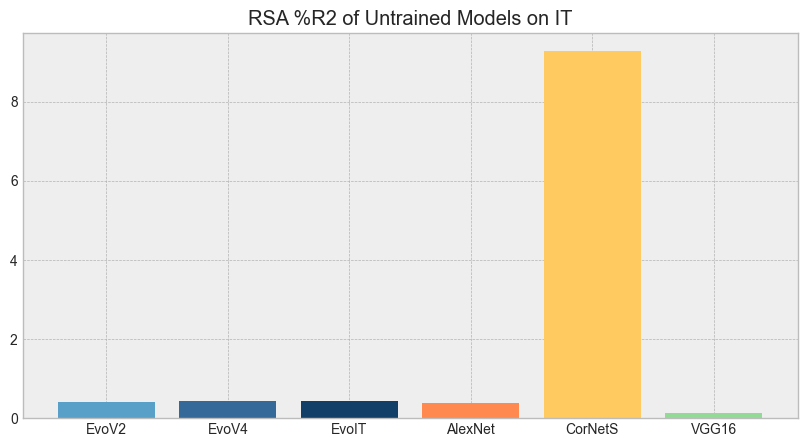

In [31]:
import matplotlib.pyplot as plt
model_names = ["EvoV2", "EvoV4", "EvoIT", "AlexNet", "CorNetS", "VGG16"]

colors = ["#58A0C8", "#34699A", "#113F67", "#FF894F", "#FFCB61", "#93DA97"]

roi = "IT"

plt.style.use('bmh')
plt.figure(figsize=(10, 5))
plt.title(f"RSA %R2 of Untrained Models on {roi}")
# each bar should have its own color
for i, model in enumerate(model_names):
    plt.bar(model, values_untrained[2][i], color=colors[i])
plt.legend()
plt.savefig(f"rsa_untrained_on_{roi}.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# OLD RESULTS

# Cifar10 VGG16
# IT 0.07622667 features.30
# V4 0.1840661 features.21
# V2 0.3017268 features.21

# Random VGG16
# IT 0.09318121 features.30
# V4 0.19492884 features.23
# V2 0.27050593 features.23

# EvoV2 Cifar10
# IT 0.0730200
# v4 0.113979146
# v2 0.16617145
# v1 0.16224973

#EvoV4 Cifar10
# IT 0.0653700
# v4 0.11817708
# v2 0.16151607
# v1 0.18463996

# EvoIT Cifar10
# IT 0.09087107
# v4 0.1698195
# v2 0.25473547
# v1 0.26238126

# AlexNet Cifar10
# IT 0.09359
# v4 0.13589 
# v2 0.18504
# v1 0.18549

# CorNet Cifar10
# IT 0.093473
# v4 0.099479
# v2 0.129037

In [40]:
from net2brain.rdm_creation import RDMCreator
from net2brain.evaluations.rsa import RSA

model_name = "CornetImagenet2"

dataframes = []
names = []

for i in range(5):
    name = model_name + "_" + str(i)
    names.append(name)

    #model = alexnet(weights=None, num_classes=10)
    #model.to(device)

    creator = RDMCreator(verbose=True, device='cuda')
    fx = FeatureExtractor(model="cornet_s", netset="Cornet", device='cuda', pretrained=True)
    features_1 = fx.extract(data_path=stimuli_path, save_path=name, layers_to_extract=["V1", "V2", "V4", "IT"])

    save_path = creator.create_rdms(feature_path=name, save_path=name + 'RDMs', save_format='npz')

    rsa_evaluation = RSA(name + 'RDMs', "./NSD Dataset/NSD_872_RDMs/prf-visualrois/combined", model_name=name)
    results_df = rsa_evaluation.evaluate()

    dataframes.append(results_df)

Processing files: 100%|██████████| 872/872 [00:10<00:00, 79.46it/s, subfiles=1/1]


Consolidating data per layer...


Processing files: 100%|██████████| 872/872 [00:11<00:00, 72.88it/s, subfiles=1/1]


Consolidating data per layer...


Processing files: 100%|██████████| 872/872 [00:11<00:00, 78.90it/s, subfiles=1/1]


Consolidating data per layer...


Processing files: 100%|██████████| 872/872 [00:12<00:00, 71.62it/s, subfiles=1/1]


Consolidating data per layer...


Processing files: 100%|██████████| 872/872 [00:12<00:00, 67.80it/s, subfiles=1/1]


Consolidating data per layer...


Creating RDMs: 100%|██████████| 4/4 [00:05<00:00,  1.40s/it]


In [41]:
import pandas as pd
# Calculate mean across all dataframes
# Calculate mean across all dataframes, grouping only by Model
mean_df = pd.concat(dataframes).groupby(['Layer', 'ROI']).agg({
    'R2': lambda x: x.mean(),
    '%R2': lambda x: x.mean(),
    'Significance': lambda x: x.mean(),
    'SEM': lambda x: x.mean(),
    'LNC': lambda x: x.mean(),
    'UNC': lambda x: x.mean()
}).reset_index()

# Save the mean results
mean_df.to_csv(f"CorNetS_RSA.csv")

In [13]:
import pandas as pd
mean_df = pd.read_csv(f"fin_results/IT_trained_RSA.csv")
#mean_df = mean_df[mean_df['ROI'] == '(0) IT_both_fmri']
print(mean_df)

    Unnamed: 0          Layer               ROI        R2        %R2  \
0            0  (0) RDM_0.npz  (0) IT_both_fmri  0.002052   0.742818   
1            1  (0) RDM_0.npz  (1) V1_both_fmri  0.005488   2.717172   
2            2  (0) RDM_0.npz  (2) V2_both_fmri  0.002674   1.453783   
3            3  (0) RDM_0.npz  (3) V3_both_fmri  0.001158   0.764406   
4            4  (0) RDM_0.npz  (4) V4_both_fmri  0.001598   1.360333   
..         ...            ...               ...       ...        ...   
70          70  (9) RDM_9.npz  (0) IT_both_fmri  0.014821   5.363823   
71          71  (9) RDM_9.npz  (1) V1_both_fmri  0.031934  15.811651   
72          72  (9) RDM_9.npz  (2) V2_both_fmri  0.028431  15.456431   
73          73  (9) RDM_9.npz  (3) V3_both_fmri  0.023209  15.322118   
74          74  (9) RDM_9.npz  (4) V4_both_fmri  0.019578  16.663328   

    Significance       SEM       LNC       UNC  
0   1.004303e-11  0.000226  0.276307  0.302665  
1   1.971752e-05  0.000542  0.201962 

In [90]:
import pandas as pd
model = "CorNetS"

mean_df = pd.read_csv(f"fin_results/{model}_RSA.csv")
mean_df = mean_df[mean_df['ROI'] == '(0) IT_both_fmri']
# get best R2 value from mean_df
best_R2 = mean_df['R2'].max()
# get layer name of best R2 value
best_layer = mean_df[mean_df['R2'] == best_R2]['Layer'].values[0]
print(f"Best R2 value: {best_R2}, Layer: {best_layer}")

mean_df = pd.read_csv(f"fin_results/{model}_trained_RSA.csv")
mean_df = mean_df[mean_df['ROI'] == '(0) IT_both_fmri']
# get best R2 value from mean_df
best_R2 = mean_df['R2'].max()
# get layer name of best R2 value
best_layer = mean_df[mean_df['R2'] == best_R2]['Layer'].values[0]
print(f"Best R2 value: {best_R2}, Layer: {best_layer}")


Best R2 value: 0.0255996336219724, Layer: (0) RDM_IT.npz
Best R2 value: 0.0402795148042966, Layer: (0) RDM_IT.npz


In [ ]:
print(mean_df)

mean_df = pd.read_csv(f"fin_results/{model}_trained_RSA.csv")
mean_df = mean_df[mean_df['ROI'] == '(0) IT_both_fmri']
print(mean_df)

In [136]:
# EvoNet IT
# IT 0.12222039, 0.0128668025, Last Layer
# v4 0.21678899, 0.0079327775, Last Pool Layer
# v2 0.27984476, 0.015933968, Last Pool Layer
# v1 0.28407744, 0.021377856, Last Pool Layer

# EvoNet V4
# IT 0.097308494, 0.008450467, Last Layer
# v4 0.21417163, 0.007957706, Last Layer
# v2 0.29692706, 0.01160117, Last Layer
# v1 0.3016761, 0.016298305 Last Layer

# EvoNet V2
# IT 0.08663008, 0.006555147, Last Layer
# v4 0.20878409, 0.010068333, Last Layer
# v2 0.2954001, 0.012517811, Last Layer
# v1 0.3010923, 0.020021424, Last Layer

#EvoNet V1
# IT 0.077105165, 0.0044064717 Last Layer
# v4 0.20724927, 0.008514371 Last Layer
# v2 0.30708808, 0.008514115 Last Layer
# v1 0.31472868, 0.013898974, Last Layer

# AlexNet (random)
# IT 0.10093443, 0.0075043123, Features.10 
# v1 0.26041195, 0.045051496, Features.6

# AlexNet
# v1 0.25717193, 0.0, Features.6

# CorNet 
# IT 0.1345934, 0.0, IT
# V1 0.4110171, 0.0 V2 - in V1 0.075719, 0.0 

# CorNet (random)
# IT 0.0717124, 0.011426813, IT
# V1 0.1847134, 0.05330896 V2


In [14]:
def combine_rdms(directory="ITRDMs"):
    # Get all npz files in directory
    npz_files = [f for f in os.listdir(directory) if f.endswith('.npz')]
    
    # Load and store all RDMs in a list
    rdms = []
    for npz_file in npz_files:
        data = np.load(os.path.join(directory, npz_file))
        rdm = data['rdm']
        rdms.append(rdm)
        
    # Combine all RDMs along axis 0
    combined_rdm = np.concatenate(rdms, axis=0)
    return combined_rdm

# Load and combine all RDMs
combined_rdm = combine_rdms()

# Save the combined RDM as npz with the rdm key
np.savez("combined_rdm.npz", rdm=combined_rdm)